## **4.1 Multilayer Perceptrons**

In Chapter 3, we built and trained **softmax regression models** for image classification.

Now, in Chapter 4, we move beyond linear models to **Multilayer Perceptrons (MLPs)** —  
deep neural networks with:
- One or more **hidden layers**
- **Nonlinear activation functions**
- Enhanced **model capacity** for complex patterns

---

### **4.1.1 Hidden Layers**

**Context Recap**:

In **Section 3.1.1**, we learned about **affine transformations** — they’re just a **linear transformation** (like a weighted sum) **plus a bias**.
Then in **softmax regression**, we used this to **map inputs directly to outputs**, followed by the **softmax function** to get probabilities.

That model looks like this:

```plaintext
Input (X) ──► Affine Transformation (W·X + b) ──► Softmax ──► Output (Probabilities)
```

---

This setup assumes that the **relationship between inputs and outputs is purely linear** (or affine).
That’s a **very strong and often unrealistic assumption**.

* **Real-world data is usually non-linear**.
  For example, image classification, sentiment analysis, or stock prediction — they all involve **complex patterns** that can’t be captured by a simple line or plane.

---

We **insert one or more *hidden layers*** between the input and the output.

These hidden layers allow us to:

* Capture **non-linear** relationships.
* Model **more complex functions**.
* Make the network **more powerful and flexible**.

---

Hidden layers **break the limitation of linearity** in softmax regression by enabling the model to learn and represent **non-linear** relationships through stacked transformations and activations.

---


#### **Linear Models May Go Wrong**

**Key Assumption: Monotonicity**

Linear models assume **monotonic relationships** between features and output:

* If a feature's weight is positive: increasing the feature increases the output.
* If a feature's weight is negative: increasing the feature decreases the output.

---

**Example 1: Loan Repayment (Monotonic but Non-Linear)**

* **Assumption**: Higher income → Higher probability of repayment.
* **Issue**: The increase in repayment likelihood is not linear.

  * Increase from ₹0 to ₹50,000 → Significant impact.
  * Increase from ₹1,000,000 to ₹1,050,000 → Minimal impact.
* **Fix**: Use **log(income)** to approximate linearity.

---

**Example 2: Body Temperature & Death Risk (Non-Monotonic)**

* **Observation**:

  * Below 37°C → Higher temp → Lower risk.
  * Above 37°C → Higher temp → Higher risk.
* **Issue**: Relationship is not monotonic.
* **Fix**: Use **distance from 37°C** as a feature:

  $$
  \text{Feature} = | \text{Temperature} - 37^\circ C |
  $$

---

**Example 3: Image Classification (Non-Contextual Features)**

* **Scenario**: Predict if image is of a cat or dog using pixel intensities.
* **Issue**:

  * Changing a single pixel (e.g., at position (13,17)) lacks consistent impact.
  * Image inversion (bright ↔ dark) retains the same label.
  * Pixel importance is **context-dependent**.
* **Conclusion**: Linear models fail due to lack of feature interaction modeling.

---

**Limitation**

* In complex tasks, the effect of a feature depends on interactions with other features.
* Linear models cannot capture such dependencies.

---

**Resolution via Deep Learning**

* Neural networks:

  * **Learn representations** through hidden layers.
  * **Apply linear models** on top of learned features.

---


#### **Incorporating Hidden Layers**

**Why go beyond linear models?**

Linear models can only learn **straight-line** relationships. But real-world data is often **nonlinear** — full of curves, layers, and complexity.

 To capture this complexity, we need to **go beyond one layer**.
 Solution: **Add Hidden Layers** ➝ leads to **Multilayer Perceptrons (MLPs)**.

---

**What is a Multilayer Perceptron (MLP)?**

A **Multilayer Perceptron** is a type of neural network made of:

1. **Input Layer** – just takes in data
2. **One or more Hidden Layers** – extract meaningful features
3. **Output Layer** – gives the final prediction

---


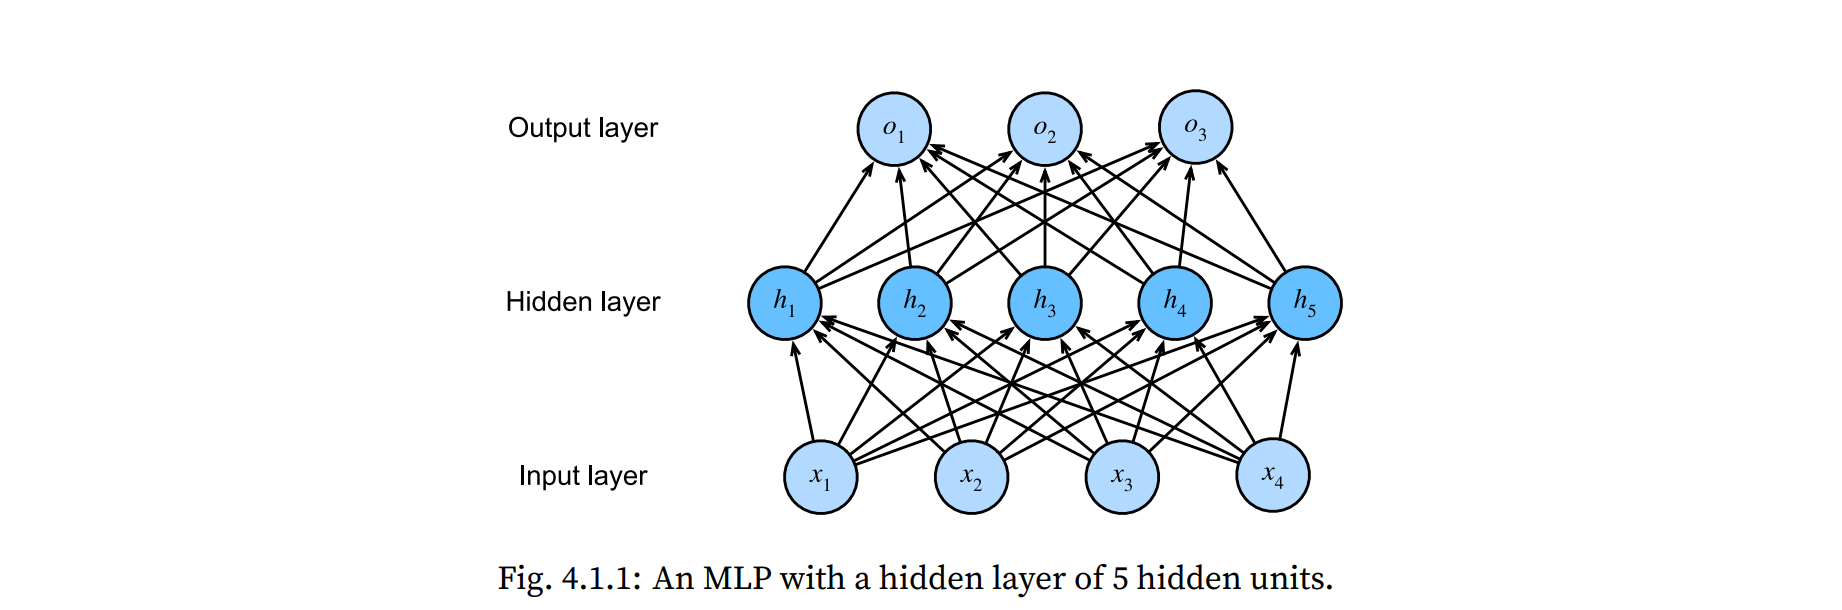

**Architecture Summary:**

| Layer        | Description                             |
| ------------ | --------------------------------------- |
| Input Layer  | 4 input features → $x_1, x_2, x_3, x_4$ |
| Hidden Layer | 5 neurons → $h_1, h_2, h_3, h_4, h_5$   |
| Output Layer | 3 outputs → $o_1, o_2, o_3$             |

---

**Fully Connected Layers**

* Every neuron in one layer is **connected to every neuron** in the next.
* Arrows = **weighted connections**.
* Each connection has a **weight** and each neuron has a **bias**.

🧮 Computation in Hidden Layer (example for $h_1$):

$$
h_1 = \sigma(w_{11}x_1 + w_{12}x_2 + w_{13}x_3 + w_{14}x_4 + b_1)
$$

Where:

* $w_{ij}$ = weight between input $x_j$ and hidden neuron $h_i$
* $b_1$ = bias for $h_1$
* $\sigma$ = activation function (like ReLU or sigmoid)

---

**Total Layers in This MLP**

* Hidden Layer: ✅
* Output Layer: ✅
* Input Layer: ❌ (just receives data, does no computation)

So, the total **computational layers** = **2**

---

**Cost of Fully Connected Layers**

1. Problem:

* Fully connected = **many parameters** (weights and biases).
* For large inputs or deep networks, this becomes **expensive in memory and computation**.

2.  Tradeoff:

* High model capacity ⚖️ vs. fewer parameters
* Later in deep learning, we use **techniques like weight sharing**, **dropout**, or **sparse connections** to manage this.

---


#### **From Linear to Nonlinear**

**Linear models** like softmax regression have a limitation:

> They can only model **linear** (or affine) relationships between input and output.

To handle more complex, **nonlinear relationships**, we introduce **hidden layers** and **nonlinear activation functions**, leading to a **Multilayer Perceptron (MLP)**.

---

**Step-by-Step: From Linear to One-Hidden-Layer MLP**

1. **Data Input**

We begin with a **minibatch of data**:

* $X \in \mathbb{R}^{n \times d}$:

  * $n$: number of examples
  * $d$: number of input features per example
  * **Shape**: Each row = one example

---

 2. **Linear Hidden Layer (Before Nonlinearity)**

We apply a **linear transformation** to get hidden representations:

* **Hidden layer weights**:
  $W^{(1)} \in \mathbb{R}^{d \times h}$
* **Hidden layer biases**:
  $b^{(1)} \in \mathbb{R}^{1 \times h}$

**Hidden output (pre-activation):**

$$
H = XW^{(1)} + b^{(1)}
$$

* $H \in \mathbb{R}^{n \times h}$
* This is still **linear**.

---

 3. **Output Layer (Also Linear)**

We transform the hidden layer into output predictions:

* **Output layer weights**:
  $W^{(2)} \in \mathbb{R}^{h \times q}$
* **Output layer biases**:
  $b^{(2)} \in \mathbb{R}^{1 \times q}$

**Final output:**

$$
O = HW^{(2)} + b^{(2)}
$$

* $O \in \mathbb{R}^{n \times q}$

---

**What’s the Problem?**

This entire setup is **still linear**!

Because:

> An affine function of an affine function is still affine.

We Can Collapse It:

Using math:

$
O = (XW^{(1)} + b^{(1)})W^{(2)} + b^{(2)} 
$

$
O= X(W^{(1)}W^{(2)}) + (b^{(1)}W^{(2)} + b^{(2)}) 
$

$
O= XW + b
$

So, we’re back to a **single-layer linear model**:

* $W = W^{(1)}W^{(2)}$
* $b = b^{(1)}W^{(2)} + b^{(2)}$

**Conclusion**: Without *nonlinearity*, adding hidden layers **gives us nothing** new.

---

**The Secret Sauce: Nonlinear Activation**

We now apply a **nonlinear function** like ReLU, sigmoid, or tanh to the hidden layer.

**Updated Architecture:**

$$
\text{Hidden: } H = \sigma(XW^{(1)} + b^{(1)}) \\
\text{Output: } O = HW^{(2)} + b^{(2)}
$$

Now it’s **no longer collapsible**. 🎉
You get **nonlinear decision boundaries** and **more expressive power**.

---

**Activation Functions**

| Function    | Formula                            | Range         | Nonlinear? | Use Case                       |
| ----------- | ---------------------------------- | ------------- | ---------- | ------------------------------ |
| **ReLU**    | $\sigma(x) = \max(0, x)$           | $[0, \infty)$ | ✅          | Fast, simple, avoids vanishing |
| **Sigmoid** | $\sigma(x) = \frac{1}{1 + e^{-x}}$ | $(0, 1)$      | ✅          | Probabilities, binary tasks    |
| **Tanh**    | $\sigma(x) = \tanh(x)$             | $(-1, 1)$     | ✅          | Centered outputs               |

---

**Final Model Architecture Diagram (One-Hidden-Layer MLP)**

```plaintext
Input X ∈ ℝⁿˣᵈ
     │
     ▼
Linear Layer: XW¹ + b¹
     │
     ▼
Activation σ: ReLU, Sigmoid, etc.
     │
     ▼
Hidden Output H ∈ ℝⁿˣʰ
     │
     ▼
Output Layer: HW² + b²
     │
     ▼
Output O ∈ ℝⁿˣq (e.g., logits for softmax)
```

---

**Going Deeper: Multiple Hidden Layers**

You can **stack more hidden layers** to build deeper MLPs:

$$
H^{(1)} = \sigma_1(XW^{(1)} + b^{(1)}) \\
H^{(2)} = \sigma_2(H^{(1)}W^{(2)} + b^{(2)}) \\
\vdots \\
O = H^{(L-1)}W^{(L)} + b^{(L)}
$$

Each added layer lets you model more complex functions!

---


#### **Universal Approximators:**

 **Definition:**

A **universal approximator** is a function approximator capable of approximating any continuous function on a compact subset of ℝⁿ to arbitrary precision, given sufficient resources such as width or depth.

---

**MLPs as Universal Approximators:**

Multilayer Perceptrons (MLPs), when equipped with **nonlinear activation functions** (e.g., sigmoid, tanh, ReLU), possess the universal approximation property. Specifically:

> **The Universal Approximation Theorem** states that:

> A feedforward neural network with a **single hidden layer** containing a **finite number of neurons**, using a **non-constant, bounded, and continuous activation function**, can approximate **any continuous function** on a compact domain of ℝⁿ, **to any desired degree of accuracy**, provided the network has a sufficiently large number of hidden units.

**Implications:**

* MLPs can model highly complex, nonlinear functions.
* Even with only **one hidden layer**, an MLP can approximate any function, though this may require an **exponentially large** number of neurons.

---

**Practical Considerations:**

1. **Feasibility**:
   While theoretically possible, training such wide single-layer networks is often computationally inefficient and prone to overfitting.

2. **Depth vs. Width**:
   In practice, **deep networks** (i.e., multiple hidden layers) are more effective and **parameter-efficient** than excessively wide shallow networks for learning complex functions.

3. **Computational Analogy**:
   The expressiveness of an MLP is analogous to that of a **Turing-complete language** (e.g., C language).

   * Both are **theoretically capable** of expressing any computable logic.
   * The **challenge** lies not in the expressiveness, but in **constructing the desired behavior** (i.e., training the network or writing the correct program).

---


### **4.1.2 Activation Functions**

**What is an Activation Function?**

An **activation function** decides whether a neuron should "fire" or not by:

* Computing the **weighted sum + bias** of its inputs.
* Then applying a **non-linear function** (activation) to it.

**Why is it Needed?**

Without activation functions:

* Neural networks become just **stacked linear layers**, which are equivalent to **a single linear transformation**.
* Non-linearity is necessary to model **complex, real-world phenomena** like language, vision, etc.

---


#### **1. ReLU (Rectified Linear Unit)**


   

**Mathematical Formula**

$$
\text{ReLU}(x) = \max(0, x)
$$

**Intuition:**

* Keeps **positive values** unchanged
* Turns **negative values** to **0**
* Adds **non-linearity** cheaply and effectively

**Derivative of ReLU:**

$$
\frac{d}{dx} \text{ReLU}(x) =
\begin{cases}
1 & \text{if } x > 0 \\
0 & \text{if } x < 0 \\
\text{undefined} & \text{if } x = 0 \\
\end{cases}
$$

In practice: for $x = 0$, we just use 0.

---

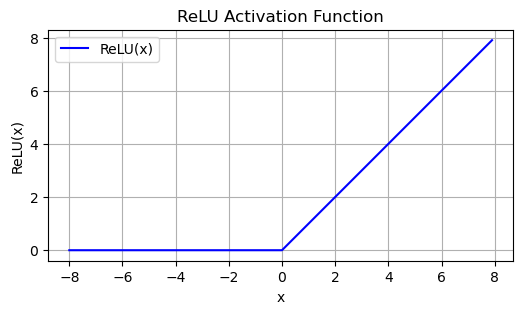

In [1]:
# PyTorch Implementation of ReLU

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Step 1: Create input tensor
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)

# Step 2: Apply ReLU
y = torch.relu(x)

# Step 3: Plot ReLU
plt.figure(figsize=(6, 3))
plt.plot(x.detach().numpy(), y.detach().numpy(), label='ReLU(x)', color='blue')
plt.title("ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.legend()
plt.show()


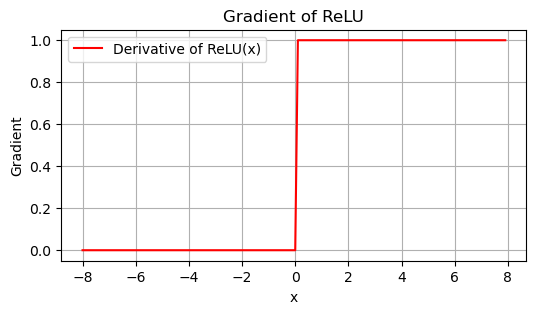

In [2]:
# Compute and Derivative (Gradient) Plot for ReLU

# Clear existing gradients
if x.grad is not None:
    x.grad.zero_()

# Backpropagation to compute gradient
y.backward(torch.ones_like(x), retain_graph=True)

# Plot gradient
plt.figure(figsize=(6, 3))
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label="Derivative of ReLU(x)", color='red')
plt.title("Gradient of ReLU")
plt.xlabel("x")
plt.ylabel("Gradient")
plt.grid(True)
plt.legend()
plt.show()


**Why is ReLU Preferred?**

| Feature                        | Explanation                                       |
| ------------------------------ | ------------------------------------------------- |
| ✅ Simple                       | Just compares to 0                                |
| ✅ Non-linear                   | Enables modeling of complex patterns              |
| ✅ Sparse Activation            | Sets many values to 0, making computation cheaper |
| ✅ Mitigates Vanishing Gradient | Since gradient is 1 for $x > 0$                   |

---

**Variant: PReLU (Parametric ReLU)**

**Formula:**

$$
\text{PReLU}(x) = \max(0, x) + \alpha \min(0, x)
$$

* $\alpha$ is a small **learnable parameter** (e.g. 0.01).
* If $x < 0$, instead of setting to 0, we **allow a small slope** $\alpha x$.

**Intuition:**

* Keeps the good parts of ReLU
* But **lets some information flow** even if the input is negative

---

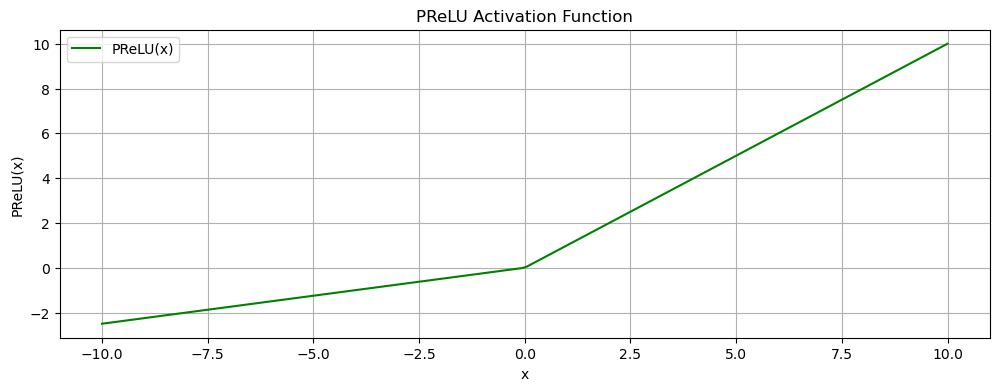

In [3]:
# PyTorch Implementation of PReLU

import torch.nn as nn

# Step 1: Define PReLU activation
prelu = nn.PReLU()  # alpha is learnable by default

# Step 2: Input
x = torch.linspace(-10, 10, 200).reshape(-1, 1)
y = prelu(x)

# Step 3: Plot PReLU
plt.figure(figsize=(12, 4))
plt.plot(x.detach().numpy(), y.detach().numpy(), label="PReLU(x)", color='green')
plt.title("PReLU Activation Function")
plt.xlabel("x")
plt.ylabel("PReLU(x)")
plt.grid(True)
plt.legend()
plt.show()


---

**What is the derivative of PReLU**?

Recall:

$$
\text{PReLU}(x) =
\begin{cases}
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0
\end{cases}
$$

So its derivative is:

$$
\frac{d}{dx} \text{PReLU}(x) =
\begin{cases}
1 & \text{if } x > 0 \\
\alpha & \text{if } x < 0 \\
\text{undefined (set to α)} & \text{if } x = 0
\end{cases}
$$

---


**Pro Tip: Check or Set Alpha Manually**

```python
# Python
prelu = nn.PReLU()
print("Alpha (learnable):", prelu.weight.item())

# Set alpha manually if you want
prelu.weight.data.fill_(0.1)
```

---

**Summary Table**

| Activation | Formula                   | Non-linearity | Derivative           | Handles Negatives? | Learnable? |
| ---------- | ------------------------- | ------------- | -------------------- | ------------------ | ---------- |
| ReLU       | $\max(0, x)$              | Yes           | 1 (x > 0), 0 (x < 0) | No                 | No         |
| PReLU      | $\max(0, x) + \alpha x^-$ | Yes           | $\alpha$ or 1        | Yes (via α)        | Yes        |

---

**Takeaway**

* ReLU is **simple**, fast, and effective. That's why it’s the **default**.
* PReLU is a **more flexible version** that can learn to keep some negative input.

If you're building deep networks in PyTorch, use:

```python
nn.ReLU()   # fast, simple
nn.PReLU()  # if you suspect dead neurons or want flexibility
```

---


#### **2. Sigmoid Function**



**Mathematical Form and Behavior**

The **sigmoid function** is defined as:

$$
\text{sigmoid}(x) = \frac{1}{1 + e^{-x}} \tag{4.1.6}
$$

* **Domain**: $\mathbb{R}$ (all real values)
* **Range**: $(0, 1)$ — so any real number input gets mapped to a value strictly between 0 and 1.
* This **compresses** or “**squashes**” the input space into a narrow, interpretable output range.

---

**Intuition**

* Sigmoid "squashes" large positive values to values near 1, and large negative values to values near 0.
* It acts like a **soft yes/no** gate — good for probability outputs.
* Near $x = 0$, sigmoid behaves approximately **linear**, so it has some useful gradient information.

**Derivative:**

To compute the derivative:

Let $s = \sigma(x)$. Then,

$$
\frac{d}{dx} \sigma(x) = \sigma(x)(1 - \sigma(x))
$$

**Why?**

Start with:

$$
\sigma(x) = \frac{1}{1 + e^{-x}} \Rightarrow \frac{d\sigma}{dx} = \frac{e^{-x}}{(1 + e^{-x})^2}
$$

But note:

$$
\sigma(x) = \frac{1}{1 + e^{-x}} \Rightarrow 1 - \sigma(x) = \frac{e^{-x}}{1 + e^{-x}}
$$

Therefore,

$$
\frac{d\sigma}{dx} = \sigma(x)(1 - \sigma(x))
$$

This is elegant and efficient for computation!

---


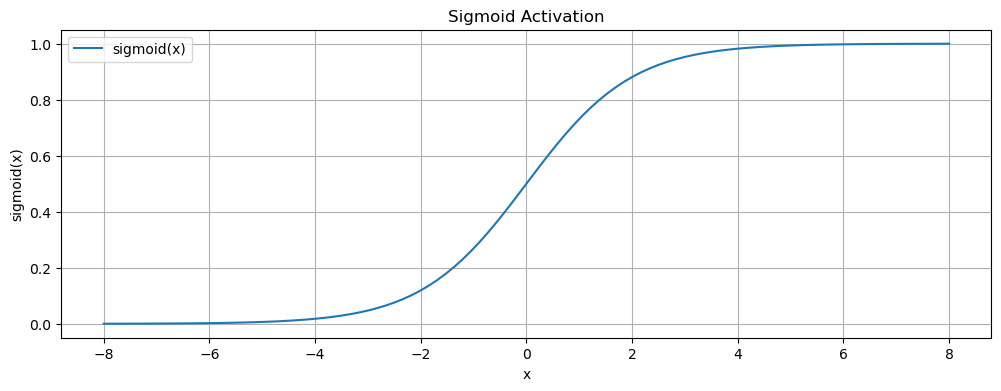

In [4]:
##  PyTorch Implementation

import torch
import matplotlib.pyplot as plt

# 1. Create input tensor (simulate input from -8 to +8)
x = torch.linspace(-8, 8, 100, requires_grad=True)

# 2. Apply sigmoid activation
y = torch.sigmoid(x)

# 3. Plot sigmoid function
plt.figure(figsize=(12, 4))
plt.plot(x.detach(), y.detach(), label='sigmoid(x)')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Activation')
plt.grid(True)
plt.legend()
plt.show()


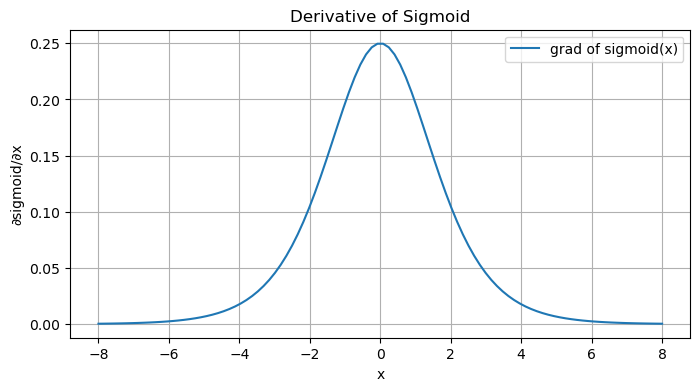

In [5]:
### Derivative using Autograd

# 4. Clear gradients (if any)
if x.grad is not None:
    x.grad.zero_()

# 5. Backpropagate (dL/dy = 1 assumed)
y.backward(torch.ones_like(x), retain_graph=True)

# 6. Plot derivative
plt.figure(figsize=(8, 4))
plt.plot(x.detach(), x.grad, label="grad of sigmoid(x)")
plt.xlabel("x")
plt.ylabel("∂sigmoid/∂x")
plt.title("Derivative of Sigmoid")
plt.grid(True)
plt.legend()
plt.show()


**Observations from Plot**

* **Sigmoid(x)**:

  * Flat near -8 and +8.
  * Sharpest transition at 0.
* **Derivative**:

  * Peak at $x = 0$ (maximum gradient = 0.25).
  * Tends to zero as $x \to \pm \infty$.

---

**Limitation: Vanishing Gradient**

As $x \to \pm \infty$, the gradient approaches 0:

$$
\lim_{x \to \infty} \sigma'(x) = 0, \quad \lim_{x \to -\infty} \sigma'(x) = 0
$$

This can **slow down learning**, especially in deep networks. That’s why **ReLU** often replaces sigmoid in hidden layers.

---


#### **3. Tanh Function**

**What is the Tanh (Hyperbolic Tangent) Activation Function?**

**Definition:**

The **tanh** function squashes its input into a range between **−1 and 1**, making it a **zero-centered** activation function (unlike sigmoid which outputs between 0 and 1).

**Mathematical Formula:**

$$
\tanh(x) = \frac{1 - e^{-2x}}{1 + e^{-2x}}
$$

This is equivalent to:

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

---

**Why use tanh in Neural Networks?**

| Property       | Tanh Explanation                                                                    |
| -------------- | ----------------------------------------------------------------------------------- |
| Output Range   | $-1$ to $+1$                                                                        |
| Zero-centered  | Helps optimization — better weight updates during backpropagation                   |
| S-shaped curve | Nonlinear, allowing stacking layers to learn complex patterns                       |
| Differentiable | Necessary for gradient-based optimization                                           |
| Saturates      | Like sigmoid, large input magnitudes push gradients towards 0 (vanishing gradients) |

---

**Graphical View** 

1. **Function behavior:**

* Near $x = 0$: behaves almost linearly.
* As $x \to +\infty$: $\tanh(x) \to 1$
* As $x \to -\infty$: $\tanh(x) \to -1$

2. **Derivative of tanh:**

$$
\frac{d}{dx} \tanh(x) = 1 - \tanh^2(x)
$$

* Maximum slope is 1 at $x=0$
* Vanishes as $x \to \pm \infty$, causing vanishing gradient issues in deep networks

---


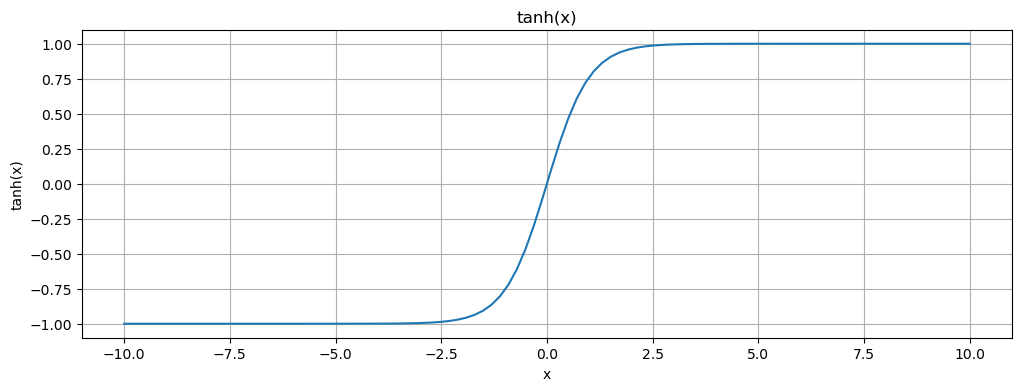

In [6]:
# PyTorch Implementation of tanh Function
import torch
import matplotlib.pyplot as plt

# Generate input tensor
x = torch.linspace(-10, 10, 100, requires_grad=True)

# Tanh activation
y = torch.tanh(x)

# Plot tanh function
plt.figure(figsize=(12, 4))
plt.plot(x.detach(), y.detach())
plt.title("tanh(x)")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.grid(True)
plt.show()


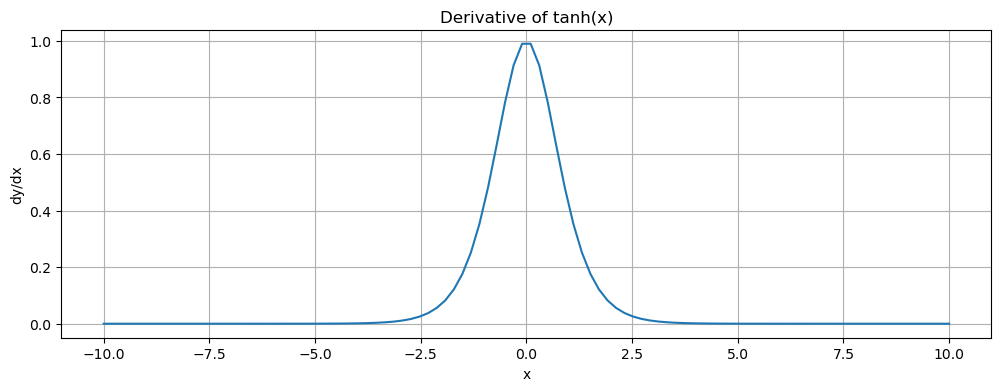

In [7]:
# PyTorch Implementation of derivative of tanh function
# Compute derivative
x.grad = None  # clear previous gradient
y.backward(torch.ones_like(x), retain_graph=True)  # compute dy/dx = 1 - tanh^2(x)

# Plot derivative of tanh
plt.figure(figsize=(12, 4))
plt.plot(x.detach(), x.grad)
plt.title("Derivative of tanh(x)")
plt.xlabel("x")
plt.ylabel("dy/dx")
plt.grid(True)
plt.show()



---

**Summary**

| Feature            | Tanh Activation Function              |
| ------------------ | ------------------------------------- |
| Output Range       | (-1, 1)                               |
| Zero-centered?     | ✅ Yes                                 |
| Saturation         | ✅ Yes (gradient → 0 at extremes)      |
| Derivative Formula | $1 - \tanh^2(x)$                      |
| Main Issue         | Vanishing gradients for deep networks |
| Good For           | Hidden layers in shallow networks     |

---

**When to Prefer Tanh?**

* **When you need zero-centered outputs** (especially compared to sigmoid).
* In **shallow networks** or **GRUs/LSTMs** where tanh is often used.
* Not ideal for very **deep networks** unless techniques like **BatchNorm**, **ResNets**, or **ReLU** variants are used to mitigate vanishing gradients.

---


### **Exercises**

#### **1. Compute the derivative of the pReLU activation function.**

**What is pReLU?**

The **pReLU** activation function is defined as:

$$
f(x) = \begin{cases} 
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0
\end{cases}
$$

where $\alpha$ is a learnable parameter (a small positive constant, typically).

---

**Derivative of pReLU**

The derivative $f'(x)$ with respect to $x$ is:

$$
f'(x) = \begin{cases} 
1 & \text{if } x > 0 \\
\alpha & \text{if } x \leq 0
\end{cases}
$$

---

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def prelu(x, alpha):
    """
    Compute the pReLU activation function.
    
    Parameters:
    - x (np.ndarray): Input array.
    - alpha (float): Slope for negative inputs.
    
    Returns:
    - np.ndarray: pReLU output.
    """
    return np.where(x > 0, x, alpha * x)

def prelu_derivative(x, alpha):
    """
    Compute the derivative of the pReLU activation function.
    
    Parameters:
    - x (np.ndarray): Input array.
    - alpha (float): Slope parameter for negative inputs.
    
    Returns:
    - np.ndarray: Derivative of pReLU.
    """
    return np.where(x > 0, 1, alpha)




```python
# Python
return np.where(x > 0, 1, alpha)
```

This means:

* If `x > 0`, derivative = 1
* Else, derivative = alpha


In [19]:

# Input range
x = np.linspace(-5, 5, 400)
alpha = 0.5 # Example alpha value

# Compute pReLU and its derivative
y = prelu(x, alpha)
dy = prelu_derivative(x, alpha)


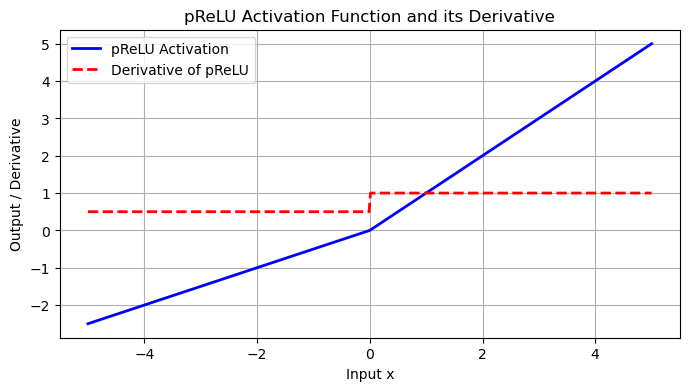

In [21]:
# Plotting
plt.figure(figsize=(8,4))

plt.plot(x, y, label='pReLU Activation', color='blue', linewidth=2)
plt.plot(x, dy, label='Derivative of pReLU', color='red', linestyle='--', linewidth=2)

plt.title('pReLU Activation Function and its Derivative')
plt.xlabel('Input x')
plt.ylabel('Output / Derivative')
plt.grid(True)
plt.legend()
plt.show()


---

#### **2. Show that an MLP using only ReLU (or pReLU) constructs a continuous piecewise linear function.**



An **MLP (Multi-Layer Perceptron)** is a function composed of layers, where each layer applies an affine transformation followed by a non-linear activation.

Mathematically, for input $x \in \mathbb{R}^d$, an MLP with $L$ layers is:

$$
f(x) = f^{(L)}(f^{(L-1)}( \dots f^{(1)}(x) \dots ))
$$

where each layer $f^{(l)}$ is

$$
f^{(l)}(z) = \sigma(W^{(l)} z + b^{(l)}),
$$

* $W^{(l)}$ is the weight matrix,
* $b^{(l)}$ is the bias vector,
* $\sigma$ is the activation function applied element-wise.

---

**Why is the MLP with ReLU or pReLU **piecewise linear**?**

* **Affine transformations** $z \mapsto Wz + b$ are linear functions plus a shift.
* **ReLU** is defined as:

$$
\text{ReLU}(x) = \max(0, x)
$$

which is piecewise linear, continuous but **not differentiable at 0**.

* **pReLU** generalizes ReLU:

$$
\text{pReLU}(x) = \begin{cases}
x & x > 0 \\
\alpha x & x \le 0
\end{cases}
$$

which is also piecewise linear and continuous.

---

**Composition of piecewise linear functions**

* The composition of **piecewise linear functions is still piecewise linear**.
* Affine transformations are linear functions.
* Applying ReLU/pReLU activations slices the input space into regions where the function behaves like a linear function with certain slopes (the "pieces").
* As the input passes through layers, these linear pieces combine and split into finer subregions — resulting in a **continuous piecewise linear function**.

---

**Continuity**

* Affine transformations are continuous.
* ReLU and pReLU are continuous.
* Composition of continuous functions is continuous.

Hence, the MLP with ReLU or pReLU activations is **continuous** everywhere.

---

**Intuition:**

* Each neuron with ReLU/pReLU splits its input space into two linear regimes (activated or not).
* The network’s output is a **linear function within each region**, but across different regions, the linear coefficients differ.
* This creates a complex function made up of many linear “pieces” joined continuously.

---


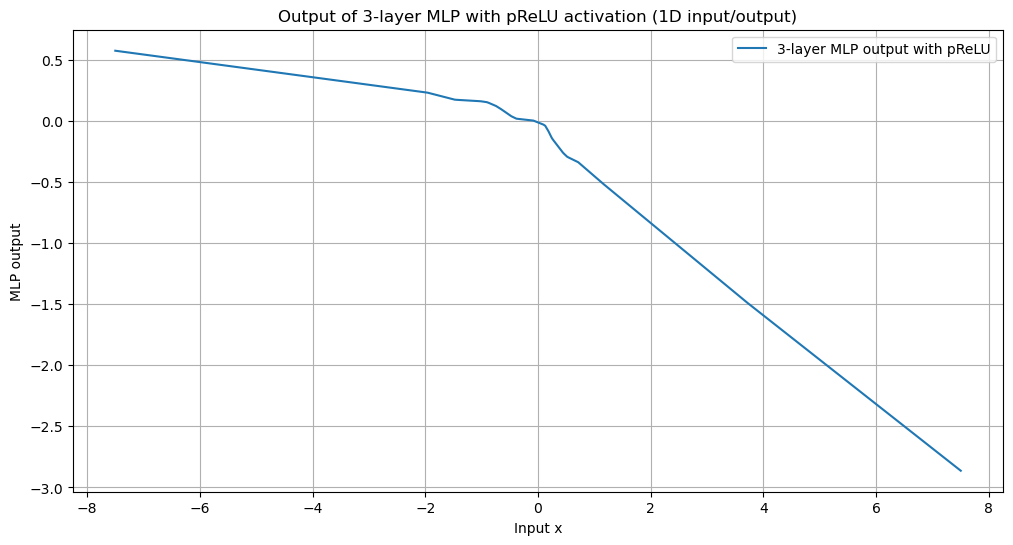

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def prelu(x, alpha=0.25):
    return np.where(x > 0, x, alpha * x)

def mlp_forward(x, weights, biases, activation=prelu, alpha=0.1):
    out = x
    for i, (W, b) in enumerate(zip(weights, biases)):
        out = np.dot(out, W) + b
        # Apply activation after every layer except the last
        if i < len(weights) - 1:
            out = activation(out, alpha=alpha)
    return out

# Set random seed for reproducibility
np.random.seed(42)

# Define layer sizes for a 3-layer MLP:
# Input dimension: 1
# Hidden layers: 10, 10
# Output dimension: 1
layer_sizes = [1, 10, 10, 1]

weights = []
biases = []

for i in range(len(layer_sizes) - 1):
    W = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.5
    b = np.random.randn(layer_sizes[i+1]) * 0.1
    weights.append(W)
    biases.append(b)

# Input values
x_vals = np.linspace(-7.5, 7.5, 1000).reshape(-1, 1)

# Forward pass through the MLP
y_vals = mlp_forward(x_vals, weights, biases, activation=prelu, alpha=0.1)

# Plot the output function
plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_vals, label='3-layer MLP output with pReLU')
plt.title('Output of 3-layer MLP with pReLU activation (1D input/output)')
plt.xlabel('Input x')
plt.ylabel('MLP output')
plt.grid(True)
plt.legend()
plt.show()


---

#### **3. Show that tanh(x) + 1 = 2 sigmoid(2x).**

Let’s prove the identity:

$$
\tanh(x) + 1 = 2 \cdot \sigma(2x)
$$

where $\sigma(x)$ is the sigmoid function defined as:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

---

**Proof:**

**Step 1: Recall definitions**

* Hyperbolic tangent:

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

* Sigmoid function:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

---

**Step 2: Write $\tanh(x) + 1$ using exponentials:**

$$
\tanh(x) + 1 = \frac{e^x - e^{-x}}{e^x + e^{-x}} + 1 = \frac{e^x - e^{-x} + e^x + e^{-x}}{e^x + e^{-x}} = \frac{2 e^x}{e^x + e^{-x}}
$$

---

**Step 3: Simplify the denominator:**

Multiply numerator and denominator by $e^{x}$:

$$
\frac{2 e^x}{e^x + e^{-x}} = \frac{2 e^x \cdot e^x}{(e^x + e^{-x}) \cdot e^x} = \frac{2 e^{2x}}{e^{2x} + 1}
$$

---

**Step 4: Write sigmoid $\sigma(2x)$:**

$$
\sigma(2x) = \frac{1}{1 + e^{-2x}} = \frac{e^{2x}}{e^{2x} + 1}
$$

---

**Step 5: Multiply sigmoid by 2:**

$$
2 \sigma(2x) = 2 \cdot \frac{e^{2x}}{e^{2x} + 1} = \frac{2 e^{2x}}{e^{2x} + 1}
$$

---

**Step 6: Compare:**

$$
\tanh(x) + 1 = \frac{2 e^{2x}}{e^{2x} + 1} = 2 \sigma(2x)
$$

Thus proved:

$$
\boxed{
\tanh(x) + 1 = 2 \sigma(2x)
}
$$

---


In [45]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 100)

left = np.tanh(x) + 1
right = 2 * sigmoid(2 * x)

print(np.allclose(left, right))  # Should print True


True


---

#### **4. Assume that we have a nonlinearity that applies to one minibatch at a time. What kinds of problems do you expect this to cause?**



Applying a nonlinearity function to an entire minibatch collectively, rather than individually to each example or element, introduces several fundamental problems in both the training and inference processes of neural networks:

1. **Violation of Sample Independence:**
   Typically, neural network activations are computed independently for each input example, reflecting the assumption that training samples are independent and identically distributed (i.i.d). When a nonlinearity is applied across the entire minibatch simultaneously, the output for each sample becomes dependent on the other samples in the batch. This inter-sample dependency violates the i.i.d assumption and can cause the model’s behavior to vary unpredictably depending on the particular composition of the minibatch.

2. **Instability and Variance in Training:**
   Because the output for any individual sample depends on the entire batch, differences in minibatch composition (e.g., presence of outliers or samples from different distributions) lead to variations in activation values. This introduces additional noise and variance in the forward pass, which can destabilize training, slow down convergence, or cause the model to learn suboptimal representations.

3. **Batch-Size Dependency and Inference Issues:**
   The dependency on the entire minibatch causes the model’s output to vary with batch size. During inference, when samples are often processed individually or with a different batch size than training, the nonlinearity may produce inconsistent or unpredictable results. This complicates model deployment, as the model no longer exhibits consistent behavior across varying batch sizes.

4. **Complexity in Gradient Computation:**
   Since activations of one sample depend on others, the gradients calculated during backpropagation become entangled across the batch. This interdependence complicates gradient calculations and may increase computational overhead. Additionally, it can introduce instability in gradient estimates, thereby adversely affecting the optimization process.

5. **Unintended Normalization Effects:**
   Applying a nonlinearity over the entire batch may unintentionally incorporate normalization-like behavior, similar to Batch Normalization, where batch statistics influence the output. However, if such effects are not explicitly designed and controlled, they can lead to unpredictable scaling or shifting of activations, reducing the expressiveness and robustness of the model.

---

**Conclusion:**
In summary, applying a nonlinearity to an entire minibatch at once undermines the core assumption of sample independence in neural network processing. It leads to batch-dependent outputs, training instability, gradient entanglement, inference inconsistencies, and potential unintended normalization effects. For these reasons, nonlinear activation functions are conventionally applied element-wise and independently across samples to ensure stable and predictable learning and inference behavior.

---